In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
from skimage.metrics import peak_signal_noise_ratio
from scipy.fft import fft2, ifft2
import ipywidgets as widgets
from tqdm.notebook import tqdm
import pandas as pd

1. Apply the FFT and discard low coefficients ( Threshold T) reconstruct the image real and compute the PSNR (image ∈ [0,255])

<IPython.core.display.Javascript object>


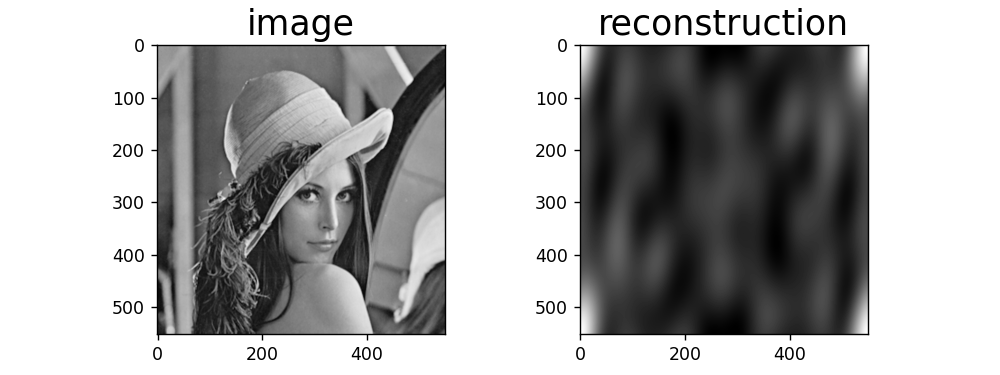

interactive(children=(IntSlider(value=0, description='Threshold:', max=11000), Button(description='Run Interac…

In [2]:
%matplotlib notebook
# Load the image (grayscale)
img = io.imread('lena.png', as_gray=True)

# Apply the FFT
img_fft = fft2(img)

# Get the magnitude spectrum
img_mag = np.abs(img_fft)

def update_image(threshold):
    if threshold == 0:
        img_recon = img
        psnr = "N/A (original image)"
    else:
        img_mag_thresh = img_mag.copy()
        img_mag_thresh[img_mag_thresh < threshold] = 0
        img_recon = np.real(ifft2(img_mag_thresh))
        img_recon = (img_recon - img_recon.min()) * 255 / (img_recon.max() - img_recon.min())
        img_recon = img_recon.astype(np.uint8)
        psnr = peak_signal_noise_ratio(img, img_recon, data_range=255)
    
    print("PSNR:", psnr)
    ax[1].imshow(img_recon, cmap='gray')
    ax[1].set_title('reconstruction', fontsize=20)
    fig.canvas.draw_idle()

# Set up the slider widget
slider = widgets.IntSlider(value=0, min=0, max=11000, step=1, description='Threshold:')

# Create the figure and axes
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))

# Display the original image
ax[0].imshow(img, cmap='gray')
ax[0].set_title('image', fontsize=20)

# Display the reconstructed image
ax[1].imshow(img, cmap='gray')
ax[1].set_title('reconstruction', fontsize=20)

# Add the slider to the plot and set the callback function
widgets.interact_manual(update_image, threshold=slider)

# Show the plot
plt.show()

In [3]:
# Load the image (grayscale)
img = io.imread('lena.png', as_gray=True)

# Apply the FFT
img_fft = fft2(img)

# Get the magnitude spectrum
img_mag = np.abs(img_fft)

def calculate_psnr(threshold):
    if threshold == 0:
        img_recon = img
        psnr = "N/A (original image)"
    else:
        img_mag_thresh = img_mag.copy()
        img_mag_thresh[img_mag_thresh < threshold] = 0
        img_recon = np.real(ifft2(img_mag_thresh))
        img_recon = (img_recon - img_recon.min()) * 255 / (img_recon.max() - img_recon.min())
        img_recon = img_recon.astype(np.uint8)
        psnr = peak_signal_noise_ratio(img, img_recon, data_range=255)
    
    return psnr

# Calculate PSNR for 10 threshold values in ascending order
threshold_values = np.linspace(0, 11000, num=10)
threshold_values.sort()
psnr_values = [calculate_psnr(threshold) for threshold in threshold_values]

# Create a table using pandas
data = {'Threshold': threshold_values, 'PSNR': psnr_values}
df = pd.DataFrame(data)
print(df)

      Threshold                  PSNR
0      0.000000  N/A (original image)
1   1222.222222             18.572932
2   2444.444444             15.449383
3   3666.666667             13.517774
4   4888.888889              10.09876
5   6111.111111              7.330563
6   7333.333333              7.429627
7   8555.555556              5.399063
8   9777.777778              5.099381
9  11000.000000              4.303033


2. using DCT (Discrete Cosine Transform)

PSNR: 16.742427021510043


<IPython.core.display.Javascript object>


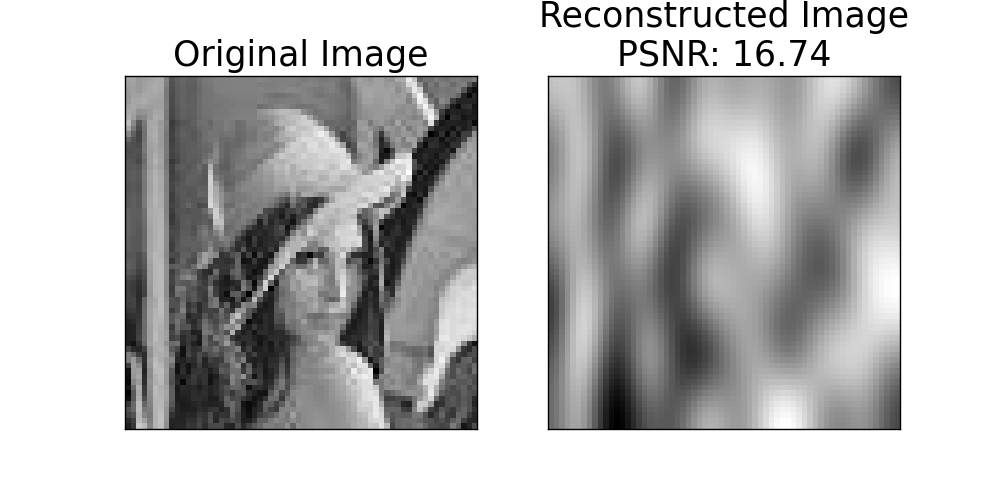

In [7]:
%matplotlib notebook
# Load the image (grayscale)
img = io.imread('lena64.jpg', as_gray=True)

# Set the threshold value
T = 0.95

# Implement DCT function
def custom_dct2(a):
    N, M = a.shape
    C = np.zeros((N, M))
    for u in range(N):
        for v in range(M):
            k1 = 1 / np.sqrt(N) if u == 0 else np.sqrt(2 / N)
            k2 = 1 / np.sqrt(M) if v == 0 else np.sqrt(2 / M)
            C[u, v] = k1 * k2 * np.sum([a[i, j] * np.cos(np.pi * u * (2 * i + 1) / (2 * N))
                                        * np.cos(np.pi * v * (2 * j + 1) / (2 * M)) for i in range(N) for j in range(M)])
    return C

# Implement inverse DCT function
def custom_idct2(C):
    N, M = C.shape
    a = np.zeros((N, M))
    for i in range(N):
        for j in range(M):
            a[i, j] = np.sum([C[u, v] * (1 / np.sqrt(N) if u == 0 else np.sqrt(2 / N)) 
                              * (1 / np.sqrt(M) if v == 0 else np.sqrt(2 / M)) 
                              * np.cos(np.pi * u * (2 * i + 1) / (2 * N)) 
                              * np.cos(np.pi * v * (2 * j + 1) / (2 * M)) for u in range(N) for v in range(M)])
    return a

# Perform custom DCT
dct_img = custom_dct2(img)

# Apply the threshold
dct_img_thresh = dct_img.copy()
dct_img_thresh[np.abs(dct_img_thresh) < T] = 0

# Perform custom inverse DCT
idct_img = custom_idct2(dct_img_thresh)

# Compute the PSNR
psnr = peak_signal_noise_ratio(img, idct_img, data_range=img.max() - img.min())
print("PSNR:", psnr)

# Create the figure and axes
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# Display the original image
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original Image', fontsize=20)

# Display the reconstructed image
ax[1].imshow(idct_img, cmap='gray')
ax[1].set_title(f'Reconstructed Image\nPSNR: {psnr:.2f}', fontsize=20)

# Remove axis ticks
for a in ax:
    a.set_xticks([])
    a.set_yticks([])

# Show the plot
plt.show()

In [6]:
# Load the image (grayscale)
img = io.imread('lena64.jpg', as_gray=True)

# Define threshold values to test
threshold_values = np.linspace(0,img.max(), num=10)

# Implement DCT function
def custom_dct2(a):
    N, M = a.shape
    C = np.zeros((N, M))
    for u in range(N):
        for v in range(M):
            k1 = 1 / np.sqrt(N) if u == 0 else np.sqrt(2 / N)
            k2 = 1 / np.sqrt(M) if v == 0 else np.sqrt(2 / M)
            C[u, v] = k1 * k2 * np.sum([a[i, j] * np.cos(np.pi * u * (2 * i + 1) / (2 * N))
                                        * np.cos(np.pi * v * (2 * j + 1) / (2 * M)) for i in range(N) for j in range(M)])
    return C

# Implement inverse DCT function
def custom_idct2(C):
    N, M = C.shape
    a = np.zeros((N, M))
    for i in range(N):
        for j in range(M):
            a[i, j] = np.sum([C[u, v] * (1 / np.sqrt(N) if u == 0 else np.sqrt(2 / N)) * (1 / np.sqrt(M) if v == 0 else np.sqrt(2 / M)) * np.cos(np.pi * u * (2 * i + 1) / (2 * N)) * np.cos(np.pi * v * (2 * j + 1) / (2 * M)) for u in range(N) for v in range(M)])
    return a

# Initialize lists to store threshold and PSNR values
threshold_list = []
psnr_list = []

# Loop through the threshold values and calculate PSNR for each value
for T in threshold_values:
    # Perform custom DCT
    dct_img = custom_dct2(img)

    # Apply the threshold
    dct_img_thresh = dct_img.copy()
    dct_img_thresh[np.abs(dct_img_thresh) < T] = 0

    # Perform custom inverse DCT
    idct_img = custom_idct2(dct_img_thresh)

    # Compute the PSNR
    psnr = peak_signal_noise_ratio(img, idct_img, data_range=img.max() - img.min())

    # Append the threshold and PSNR values to the lists
    threshold_list.append(T)
    psnr_list.append(psnr)

# Create a table using pandas
data = {'Threshold': threshold_list, 'PSNR': psnr_list}
df = pd.DataFrame(data)
print(df)

   Threshold        PSNR
0   0.000000  290.562041
1   0.104139   26.559582
2   0.208279   22.567492
3   0.312418   20.947842
4   0.416558   19.674507
5   0.520697   18.858531
6   0.624837   18.165151
7   0.728976   17.595277
8   0.833115   17.264851
9   0.937255   16.866715
